# Complexity of Matrix Operations

We will implement different matrix operations by hand, test the implementation and compare the speed with the optimized numpy library. We will also study the computational complexity of these matrix operations, and estimate the performance of our computer.

## Implementation of Matrix Operations (6 points)

Implement the matrix operations $\mathbf{{x}}^T\mathbf{{x}}$, $\mathbf{{A}}\mathbf{{x}}$, $\mathbf{{A}}\mathbf{{A}}$ and $\mathbf{{x}}^T\mathbf{{A}}\mathbf{{x}}$ in Python without using the numpy package. Verify your implementation. 

In [113]:

def x_dot_x(x):
    # YOUR CODE HERE
    ans = 0
    for i in range(len(x)):
        ans += x[i]*x[i]
    return ans

In [114]:
assert( x_dot_x( [1,2] ) == 5)

In [115]:
def A_dot_x (A, x):
    # YOUR CODE HERE
    
    # create vector b with zeros
    b = []
    for p in range(len(x)):
        b.append(0)
    
    # multiply each element with corresponding xi and add to b
    for i in range(len(x)):
        coeff = x[i]
        for j in range (len(A[i])):
            anj = A[i][j]
            b[j] += coeff*anj
    return b

In [116]:
assert( A_dot_x( [ [1,2], [2,1] ], [0,1] ) == [2,1] )

In [117]:
def A_dot_A (A):
    # YOUR CODE HERE
    
    # create array A2 with zeros
    A2 = []
    for p in range(len(A)):
        A2.append([])
        for q in range(len(A[p])):
            A2[p].append(0)
    
    # multiply each element with corresponding xi and add to b
    for i in range(len(A)):
        for j in range (len(A[i])):
            for k in range(len(A)):
                A2[i][j] += A[i][k] * A[k][j]
    return A2

In [118]:
assert( A_dot_A( [ [1,1], [2,0] ] ) == [ [3,1], [2,2] ])

In [119]:
def x_dot_A_dot_x (A,x):
    # A dot x
    Ax = A_dot_x(A, x)
    
    # x dot Ax
    ans = 0
    for i in range(len(x)):
        ans += x[i]*Ax[i]
    return ans

In [120]:
assert( x_dot_A_dot_x( [ [1,0], [0,1] ], [2,1] ) == 5)

## Measurement and Visualization of Run-Time (7 points)

For each of the implemented matrix operations, measure the execution
time as a function of $n$, up to execution times on the order of one 
second. Compare the execution times of your implementation with a
dedicated matrix library, e.g. the numpy package within python. Plot
the execution times for all matrix operations and both
implementations.

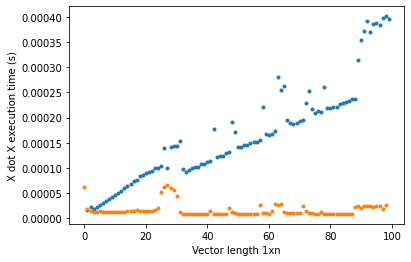

In [121]:
# ploting
import matplotlib.pyplot as plt

import numpy as np
import time


# YOUR CODE HERE

## x dot x comparison
# calc runtimes for x of length 1 to 100 using own method
x_lengths = np.arange(1, 100) # 50 000 000
xx_periods_ours = []
xx_periods_numpy = []
for x_len in x_lengths:
    
    vect = np.arange(1,x_len)
    
    init = time.time()
    b = x_dot_x(vect)
    duration = time.time() - init
    
    xx_periods_ours.append(duration)
    
    # numpy's runtime
    init = time.time()
    b = vect.dot(vect)
    duration = time.time() - init
    
    xx_periods_numpy.append(duration)
# print(xx_periods_ours)
# print(xx_periods_numpy)

# plot results

plt.plot(x_lengths, xx_periods_ours, ".", xx_periods_numpy, ".")
plt.xlabel('Vector length 1xn')
plt.ylabel('X dot X execution time (s)')
plt.show()

Present your results in a clear and understandable form. Make sure all features you refer to in the discussion below can easily be identified.

## Interpretation (7 points)

Base your answers to the following questions on your implementation and measurements above. Explain your reasoning. Refer to the plot(s) and other results where appropriate.

How do the runtimes of the implementation in pure Python and numpy compare? Can you explain the differences?

YOUR ANSWER HERE

Based on the plot(s) from the previous part, compare the computational complexity of the different matrix operations. Do the results agree with your expectations?

YOUR ANSWER HERE

How many floating point operations per second do the algorithms achieve? It is sufficient to quote a few examples.

On which hardware did you execute the tests? Are your results in line with the FLOPS of your computer?

YOUR ANSWER HERE